In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df =pd.read_csv('dnrpa-transferencias-autos-2024-combined.csv', low_memory=False)
df.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA NACIONAL,2024-07-11,1970-05-22,14005,SAN IGNACIO,Misiones,Nacional,1957.0,NaN,AUTOMOVIL,...,Privado,Física,JARDIN AMERICA,MISIONES,Masculino,1988.0,ARGENTINA,100,54,ARG
1,TRANSFERENCIA NACIONAL,2024-07-26,1971-11-02,14005,SAN IGNACIO,Misiones,Nacional,1961.0,NaN,CAMION,...,Privado,Física,PUERTO LEONI,MISIONES,Femenino,2001.0,ARGENTINA,100,54,ARG
2,TRANSFERENCIA NACIONAL,2024-07-15,1980-05-05,14005,SAN IGNACIO,Misiones,Nacional,1980.0,NaN,COUPE 2 PUERTAS,...,Privado,Física,ALBA POSSE,MISIONES,Masculino,1983.0,ARGENTINA,100,54,ARG
3,TRANSFERENCIA IMPORTADO C/PEDIDO,2024-07-25,2006-10-09,14011,PUERTO IGUAZU,Misiones,Importado,1988.0,NaN,CAMION AUTOBOMBA,...,Público,Jurídica,BERNARDO DE IRIGOYEN,MISIONES,No aplica,2017.0,No aplica,100,54,NaN
4,TRANSFERENCIA NACIONAL,2024-07-22,2008-01-17,14013,POSADAS Nº 4,Misiones,Nacional,2008.0,NaN,FOURGON COURT TYPE 600,...,Privado,Física,POSADAS,MISIONES,Masculino,1991.0,ARGENTINA,100,54,ARG


In [5]:
df.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id'],
      dtype='object')

In [6]:
registros = df['registro_seccional_provincia'].unique()

print(registros)

['Misiones' 'Neuquén' 'Río Negro' 'Salta' 'Santa Fe' 'Buenos Aires'
 'Ciudad Autónoma de Bs.As.' 'Córdoba' 'Santiago del Estero' 'Tucumán'
 'Corrientes' 'Entre Ríos' 'Mendoza' 'Chaco' 'La Pampa' 'Jujuy' 'Formosa'
 'Santa Cruz' 'San Luis' 'Chubut' 'Tierra del Fuego' 'La Rioja' 'San Juan'
 'Catamarca']


In [7]:
# Filtrar las transferencias realizadas en la Ciudad Autónoma de Bs.As. (CABA)
df_caba = df[df['registro_seccional_provincia'] == 'Ciudad Autónoma de Bs.As.']

# Contar cuántas transferencias se realizaron en CABA
transferencias_caba = df_caba.shape[0]

print(f"Cantidad de transferencias realizadas en CABA: {transferencias_caba}")


Cantidad de transferencias realizadas en CABA: 269502


In [8]:
# Filtrar las transferencias en la Ciudad Autónoma de Bs.As. (CABA)
df_caba = df[df['registro_seccional_provincia'] == 'Ciudad Autónoma de Bs.As.']

# Contar la cantidad de transferencias por modelo de automóvil
modelos_mas_vendidos = df_caba['automotor_modelo_descripcion'].value_counts().head(20)

# Mostrar los 10 modelos más vendidos en CABA
print("Los 20 modelos más vendidos en CABA:")
print(modelos_mas_vendidos)


Los 20 modelos más vendidos en CABA:
GOL TREND 1.6                           2205
GOL 1.6                                 1992
FOX 1.6                                 1458
HR-V EXL CVT                            1284
VOLKSWAGEN VENTO 2.5                    1245
ETIOS X 1.5 6M/T                        1218
ETIOS XLS 1.5 4A/T                      1200
CRONOS DRIVE 1.3 MT                     1167
GOL TREND 1.6 MSI                        978
ETIOS XLS 1.5 6M/T                       957
GOL 1.4 L                                957
GOL TREND 1.6 GP                         897
GOL TREND TRENDLINE 1.6 GAS 101CV MQ     897
FIORINO FIRE 1242 MPI 8V                 885
CRV LX                                   885
YARIS S 1.5 CVT                          873
HILUX 4X4 D/C DX 2.4 TDI 6 M/T           852
CRONOS DRIVE 1.3 GSE BZ                  834
VOYAGE 1.6                               828
HR-V EX CVT                              825
Name: automotor_modelo_descripcion, dtype: int64


In [9]:
# Obtener los 20 modelos más vendidos en una lista
top_20_modelos = modelos_mas_vendidos.index.tolist()


In [10]:
# Obtener los 20 modelos más vendidos en una lista, ya ordenados de mayor a menor cantidad de transferencias
top_20_modelos = modelos_mas_vendidos.index.tolist()

# Filtrar el DataFrame para los 20 modelos más vendidos
df_top_20 = df_caba[df_caba['automotor_modelo_descripcion'].isin(top_20_modelos)]

# Contar la cantidad de transferencias por modelo (ya tienes 'modelos_mas_vendidos', pero lo integramos aquí)
conteo_transferencias = df_top_20['automotor_modelo_descripcion'].value_counts().reset_index()
conteo_transferencias.columns = ['automotor_modelo_descripcion', 'cantidad_transferencias']

# Unir el conteo de transferencias con las columnas adicionales
df_top_20_info = df_top_20.groupby('automotor_modelo_descripcion').agg({
    'automotor_tipo_codigo': 'first',
    'automotor_tipo_descripcion': 'first',
    'automotor_marca_codigo': 'first',
    'automotor_marca_descripcion': 'first',
    'automotor_modelo_codigo': 'first'
}).reset_index()

# Combinar el conteo de transferencias con la información adicional
df_top_20_final = pd.merge(conteo_transferencias, df_top_20_info, on='automotor_modelo_descripcion')

# Ordenar el DataFrame por la cantidad de transferencias de mayor a menor
df_top_20_final = df_top_20_final.sort_values(by='cantidad_transferencias', ascending=False)

# Mostrar el resultado
print(df_top_20_final)




            automotor_modelo_descripcion  cantidad_transferencias  \
0                          GOL TREND 1.6                     2205   
1                                GOL 1.6                     1992   
2                                FOX 1.6                     1458   
3                           HR-V EXL CVT                     1284   
4                   VOLKSWAGEN VENTO 2.5                     1245   
5                       ETIOS X 1.5 6M/T                     1218   
6                     ETIOS XLS 1.5 4A/T                     1200   
7                    CRONOS DRIVE 1.3 MT                     1167   
8                      GOL TREND 1.6 MSI                      978   
10                    ETIOS XLS 1.5 6M/T                      957   
9                              GOL 1.4 L                      957   
11  GOL TREND TRENDLINE 1.6 GAS 101CV MQ                      897   
12                      GOL TREND 1.6 GP                      897   
13              FIORINO FIRE 1242 

In [11]:
df_top_20_final.head(20)

,automotor_modelo_descripcion,cantidad_transferencias,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo
0,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413
1,GOL 1.6,1992,22,SEDAN 3 PTAS,136,VOLKSWAGEN,274
2,FOX 1.6,1458,22,SEDAN 3 PTAS,136,VOLKSWAGEN,348
3,HR-V EXL CVT,1284,17.0,SEDAN 5 PUERTAS,80,HONDA,11
4,VOLKSWAGEN VENTO 2.5,1245,4,RURAL 5 PUERTAS,136,VOLKSWAGEN,404
5,ETIOS X 1.5 6M/T,1218,5.0,SEDAN 5 PUERTAS,130,TOYOTA,908
6,ETIOS XLS 1.5 4A/T,1200,5.0,SEDAN 5 PUERTAS,130,TOYOTA,911
7,CRONOS DRIVE 1.3 MT,1167,12,SEDAN 4 PUERTAS,17,FIAT,CJ
8,GOL TREND 1.6 MSI,978,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,577
10,ETIOS XLS 1.5 6M/T,957,5.0,SEDAN 5 PUERTAS,130,TOYOTA,912


In [12]:
# Filtrar el DataFrame para los 20 modelos más vendidos (ya lo hiciste)
# df_top_20_final es tu DataFrame final con los 20 modelos más vendidos y su información

# columna 'automotor_anio_modelo'  numérica
df_top_20['automotor_anio_modelo'] = pd.to_numeric(df_top_20['automotor_anio_modelo'], errors='coerce')

# Contar la cantidad de vehículos por año de fabricación para los 20 modelos más vendidos
cantidad_anio_modelo = df_top_20.groupby(['automotor_modelo_descripcion', 'automotor_anio_modelo']).size().reset_index(name='cantidad')

# Unir con el DataFrame final para incluir la información adicional
df_top_20_final_anio = pd.merge(df_top_20_final, cantidad_anio_modelo, on='automotor_modelo_descripcion', how='left')

# Ordenar el DataFrame por la cantidad de transferencias y año de fabricación
df_top_20_final_anio = df_top_20_final_anio.sort_values(by=['cantidad_transferencias', 'automotor_anio_modelo'], ascending=[False, True])

# Mostrar el resultado
print(df_top_20_final_anio)


    automotor_modelo_descripcion  cantidad_transferencias  \
0                  GOL TREND 1.6                     2205   
1                  GOL TREND 1.6                     2205   
2                  GOL TREND 1.6                     2205   
3                  GOL TREND 1.6                     2205   
4                  GOL TREND 1.6                     2205   
..                           ...                      ...   
144                  HR-V EX CVT                      825   
145                  HR-V EX CVT                      825   
146                  HR-V EX CVT                      825   
147                  HR-V EX CVT                      825   
148                  HR-V EX CVT                      825   

    automotor_tipo_codigo automotor_tipo_descripcion automotor_marca_codigo  \
0                      22            SEDAN 3 PUERTAS                    136   
1                      22            SEDAN 3 PUERTAS                    136   
2                      22     

/var/folders/67/p1_mnzf503d8vxq7q29vqzzm0000gn/T/ipykernel_56735/774309538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_20['automotor_anio_modelo'] = pd.to_numeric(df_top_20['automotor_anio_modelo'], errors='coerce')


In [13]:
df_top_20_final_anio.head(20)

,automotor_modelo_descripcion,cantidad_transferencias,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_anio_modelo,cantidad
0,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2008.0,45
1,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2009.0,198
2,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2010.0,318
3,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2011.0,327
4,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2012.0,375
5,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2013.0,3
6,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2014.0,120
7,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2015.0,537
8,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2016.0,279
9,GOL TREND 1.6,2205,22,SEDAN 3 PUERTAS,136,VOLKSWAGEN,413,2017.0,3


In [14]:
df_top_20_final_anio.to_csv('df_top_20_final_anio.csv', index=False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768067 entries, 0 to 2768066
Data columns (total 25 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   tramite_tipo                    object 
 1   tramite_fecha                   object 
 2   fecha_inscripcion_inicial       object 
 3   registro_seccional_codigo       int64  
 4   registro_seccional_descripcion  object 
 5   registro_seccional_provincia    object 
 6   automotor_origen                object 
 7   automotor_anio_modelo           float64
 8   automotor_tipo_codigo           object 
 9   automotor_tipo_descripcion      object 
 10  automotor_marca_codigo          object 
 11  automotor_marca_descripcion     object 
 12  automotor_modelo_codigo         object 
 13  automotor_modelo_descripcion    object 
 14  automotor_uso_codigo            float64
 15  automotor_uso_descripcion       object 
 16  titular_tipo_persona            object 
 17  titular_domicilio_localidad

In [16]:
df.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id'],
      dtype='object')

In [17]:

df['tramite_fecha'] = pd.to_datetime(df['tramite_fecha'], errors='coerce')

# Crear una nueva columna que extrae el año y mes de la fecha
df['mes_anio'] = df['tramite_fecha'].dt.to_period('M')

# Contar cuántas transferencias se realizaron por mes
transferencias_por_mes = df.groupby('mes_anio').size().reset_index(name='cantidad_transferencias')

# Mostrar el resultado
print(transferencias_por_mes)


  mes_anio  cantidad_transferencias
0  2024-01                   348447
1  2024-02                   318714
2  2024-03                   317970
3  2024-04                   408768
4  2024-05                   452922
5  2024-06                   371778
6  2024-07                   549468


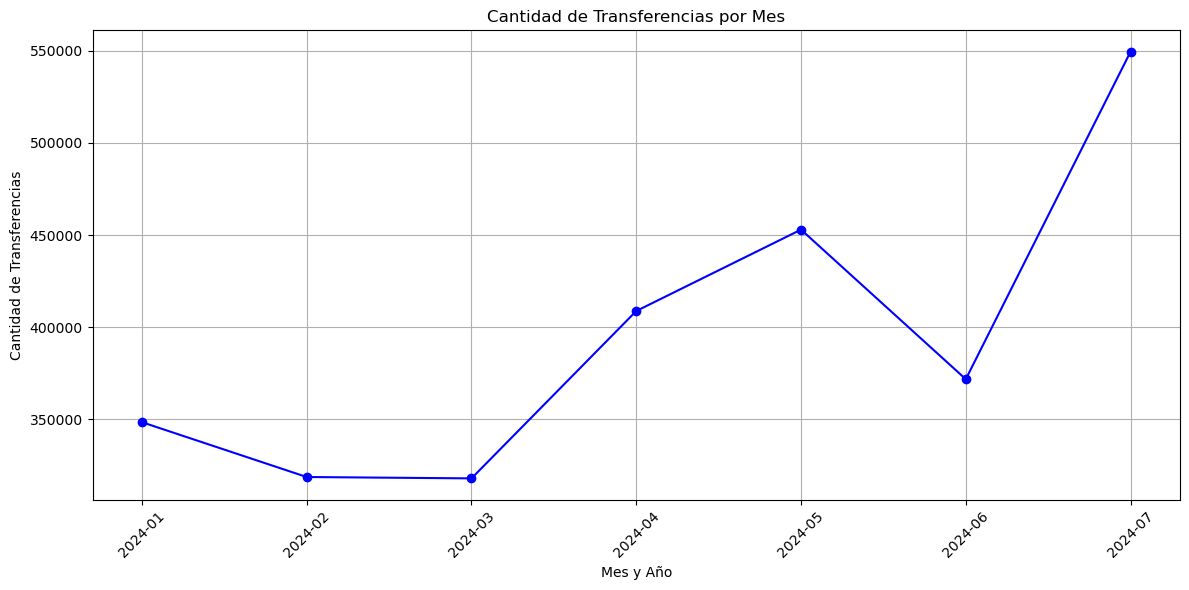

In [18]:

# Convertir 'tramite_fecha' al tipo de dato datetime
df['tramite_fecha'] = pd.to_datetime(df['tramite_fecha'], errors='coerce')

# Crear una nueva columna que extrae el año y mes de la fecha
df['mes_anio'] = df['tramite_fecha'].dt.to_period('M')

# Contar cuántas transferencias se realizaron por mes
transferencias_por_mes = df.groupby('mes_anio').size().reset_index(name='cantidad_transferencias')

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(transferencias_por_mes['mes_anio'].astype(str), transferencias_por_mes['cantidad_transferencias'], marker='o', linestyle='-', color='b')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Transferencias')
plt.title('Cantidad de Transferencias por Mes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
df.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id', 'mes_anio'],
      dtype='object')

In [63]:
# Filtrar las transferencias en la Ciudad Autónoma de Buenos Aires (CABA)
df_caba = df[df['registro_seccional_provincia'] == 'CIUDAD AUTÓNOMA DE BUENOS AIRES']

# Contar la cantidad de transferencias por modelo de automóvil
modelos_mas_vendidos = df_caba['automotor_modelo_descripcion'].value_counts().head(20).index

# Verifica los modelos más vendidos
print("Modelos más vendidos:")
print(modelos_mas_vendidos)

# Filtrar los datos para los 20 modelos más vendidos
df_top_modelos = df_caba[df_caba['automotor_modelo_descripcion'].isin(modelos_mas_vendidos)]

# Verifica el DataFrame filtrado
print("DataFrame de los 20 modelos más vendidos:")
print(df_top_modelos.head())

# la columna 'automotor_anio_modelo' es numérica
df_top_modelos['automotor_anio_modelo'] = pd.to_numeric(df_top_modelos['automotor_anio_modelo'], errors='coerce')

# Contar la cantidad de vehículos por año de fabricación para esos modelos
cantidad_anio_modelo = df_top_modelos.groupby(['automotor_modelo_descripcion', 'automotor_anio_modelo']).size().reset_index(name='cantidad')

# Mostrar el resultado
print("Cantidad de cada año de fabricación para los 20 modelos más vendidos:")
print(cantidad_anio_modelo)



Modelos más vendidos:
Index([], dtype='object')
DataFrame de los 20 modelos más vendidos:
Empty DataFrame
Columns: [tramite_tipo, tramite_fecha, fecha_inscripcion_inicial, registro_seccional_codigo, registro_seccional_descripcion, registro_seccional_provincia, automotor_origen, automotor_anio_modelo, automotor_tipo_codigo, automotor_tipo_descripcion, automotor_marca_codigo, automotor_marca_descripcion, automotor_modelo_codigo, automotor_modelo_descripcion, automotor_uso_codigo, automotor_uso_descripcion, titular_tipo_persona, titular_domicilio_localidad, titular_domicilio_provincia, titular_genero, titular_anio_nacimiento, titular_pais_nacimiento, titular_porcentaje_titularidad, titular_domicilio_provincia_id, titular_pais_nacimiento_id, mes_anio, mes]
Index: []

[0 rows x 27 columns]
Cantidad de cada año de fabricación para los 20 modelos más vendidos:
Empty DataFrame
Columns: [automotor_modelo_descripcion, automotor_anio_modelo, cantidad]
Index: []


In [21]:
df['automotor_modelo_codigo']

0           04
1          NaN
2           21
3          751
4           20
          ... 
2768062    376
2768063    780
2768064     CJ
2768065    729
2768066    729
Name: automotor_modelo_codigo, Length: 2768067, dtype: object

In [22]:
df['titular_domicilio_localidad']

0                JARDIN AMERICA
1                  PUERTO LEONI
2                    ALBA POSSE
3          BERNARDO DE IRIGOYEN
4                       POSADAS
                   ...         
2768062            VILLA ELVIRA
2768063             BERAZATEGUI
2768064            BILLINGHURST
2768065     C.AUTONOMA DE BS.AS
2768066     C.AUTONOMA DE BS.AS
Name: titular_domicilio_localidad, Length: 2768067, dtype: object

In [23]:
df['tramite_fecha']

0         2024-07-11
1         2024-07-26
2         2024-07-15
3         2024-07-25
4         2024-07-22
             ...    
2768062   2024-03-27
2768063   2024-03-27
2768064   2024-03-27
2768065   2024-03-27
2768066   2024-03-27
Name: tramite_fecha, Length: 2768067, dtype: datetime64[ns]

In [24]:
columnas_interes = ['automotor_origen', 'automotor_anio_modelo', 'automotor_tipo_codigo',
                    'automotor_tipo_descripcion', 'automotor_marca_codigo',
                    'automotor_marca_descripcion', 'automotor_modelo_codigo',
                    'automotor_modelo_descripcion']

df_filtrado = df[columnas_interes]
df_filtrado.head(20)


,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion
0,Nacional,1957.0,NaN,AUTOMOVIL,27,JEEP IKA,04,JA-1B
1,Nacional,1961.0,NaN,CAMION,NaN,FORD,NaN,FORD 1961
2,Nacional,1980.0,NaN,COUPE 2 PUERTAS,19,FORD,21,TAUNUS VERSION GT
3,Importado,1988.0,NaN,CAMION AUTOBOMBA,092,MERCEDES BENZ,751,1117 D
4,Nacional,2008.0,NaN,FOURGON COURT TYPE 600,07,CITROEN,20,BERLINGO FURGON 1.9D FULL
5,Nacional,1999.0,NaN,BERLINA 5 PTAS,37,RENAULT,DU,CLIO RN 5 PTAS PACK AA DA
6,Nacional,1969.0,NaN,AUTOMOVIL,17,FIAT,08,1500 C BERLINA
7,Nacional,1973.0,NaN,SEDAN 2 PUERTAS,08,CHEVROLET,11,CHEVY SS COUPE
8,Nacional,1969.0,NaN,JEEP,27,JEEP,04,JA-2PB
9,Nacional,1957.0,NaN,AUTOMOVIL,27,JEEP IKA,04,JA-1B


In [25]:
# Obtener los valores únicos de la columna 'automotor_tipo_descripcion'
valores_unicos = df['automotor_tipo_descripcion'].unique()

# Mostrar los valores únicos
print(valores_unicos)

['AUTOMOVIL' 'CAMION' 'COUPE 2 PUERTAS' ... 'CHASSIS  CON CABINA'
 'UNIVERSAL' 'TRANSPORTE DE CARGA.']


In [26]:
# Contar la frecuencia de cada valor único
frecuencia_valores = df['automotor_tipo_descripcion'].value_counts()

# Mostrar las frecuencias
print (frecuencia_valores)


SEDAN 5 PUERTAS               579012
SEDAN 4 PUERTAS               339399
SEDAN 5 PTAS                  309012
PICK-UP                       294861
SEDAN 4 PTAS                  257271
                               ...  
TCCE(CAJA CERRADA)                 3
FURGON 800 VIDR C/ASIENTOS         3
FURGON VIDR.CON ASIENTOS           3
FURG. VID.C/ASIENTOS TRAS.         3
TRANSPORTE DE CARGA.               3
Name: automotor_tipo_descripcion, Length: 3415, dtype: int64


In [27]:
frecuencia_valores.head(50)

SEDAN 5 PUERTAS                579012
SEDAN 4 PUERTAS                339399
SEDAN 5 PTAS                   309012
PICK-UP                        294861
SEDAN 4 PTAS                   257271
SEDAN 3 PTAS                   141222
RURAL 5 PUERTAS                128079
SEDAN 3 PUERTAS                 85593
FURGON                          80472
PICK-UP CABINA DOBLE            77364
TODO TERRENO                    74871
RURAL 5 PTAS                    50007
CHASIS C/CABINA                 38079
PICK UP                         35265
SEDAN 2 PTAS                    27015
FURGONETA                       21444
ACOPLADO                        16296
SEDAN 2 PUERTAS                 14157
SEMIRREMOLQUE                   12075
FAMILIAR                         9762
CAMION                           9132
RURAL 4/5 PUERTAS                7305
PICK-UP CABINA SIMPLE            7122
SEDAN                            6948
PICK-UP CABINA Y MEDIA           6717
TRACTOR DE CARRETERA             6639
COUPE       

In [28]:

frecuencia_valores.to_csv('automotor_tipo_descripcion.csv')

In [29]:
import pandas as pd


modelo_mas_transferido = df['automotor_modelo_descripcion'].value_counts().idxmax()
cantidad_transferencias = df['automotor_modelo_descripcion'].value_counts().max()

print(f"El modelo más transferido es: {modelo_mas_transferido} con {cantidad_transferencias} transferencias.")


El modelo más transferido es: GOL 1.6 con 44757 transferencias.


In [30]:

# 1. Contar las transferencias por modelo
transferencias_por_modelo = df['automotor_modelo_descripcion'].value_counts()

# 2. Obtener el modelo más transferido
modelo_mas_transferido = transferencias_por_modelo.idxmax()
numero_transferencias = transferencias_por_modelo.max()

print(f"El modelo más transferido es '{modelo_mas_transferido}' con {numero_transferencias} transferencias.")


El modelo más transferido es 'GOL 1.6' con 44757 transferencias.


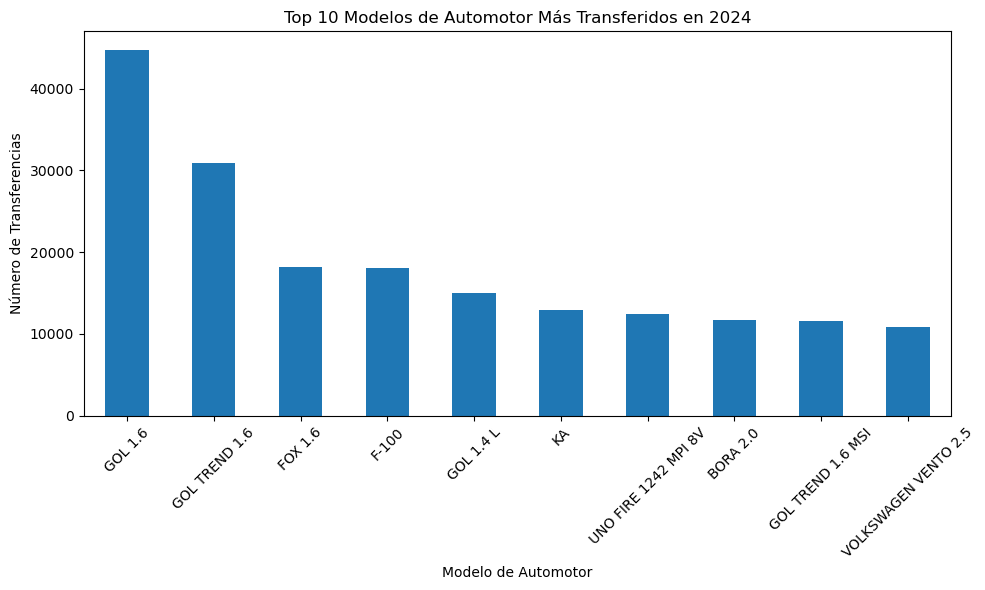

In [31]:
import matplotlib.pyplot as plt

# Graficar las 10 modelos más transferidos
transferencias_por_modelo.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Modelos de Automotor Más Transferidos en 2024')
plt.xlabel('Modelo de Automotor')
plt.ylabel('Número de Transferencias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
# 1. Contar las transferencias por modelo
transferencias_por_modelo = df['automotor_modelo_descripcion'].value_counts()

# 2. Obtener los 10 modelos más transferidos
top_10_modelos = transferencias_por_modelo.head(10).index

# 3. Filtrar el DataFrame para incluir solo los 10 modelos más transferidos
df_top_modelos = df[df['automotor_modelo_descripcion'].isin(top_10_modelos)]

# 4. Para cada modelo, contar la frecuencia de las fechas de inscripción inicial y obtener la más frecuente
resultado = df_top_modelos.groupby('automotor_modelo_descripcion')['fecha_inscripcion_inicial'].agg(lambda x: x.mode()[0])

# 5. Mostrar el resultado
print(resultado)


automotor_modelo_descripcion
BORA 2.0                2009-01-05
F-100                   1980-10-01
FOX 1.6                 2012-01-03
GOL 1.4 L               2011-11-29
GOL 1.6                 2007-12-27
GOL TREND 1.6           2011-03-30
GOL TREND 1.6 MSI       2017-06-29
KA                      1999-08-05
UNO FIRE 1242 MPI 8V    2009-01-06
VOLKSWAGEN VENTO 2.5    2011-08-17
Name: fecha_inscripcion_inicial, dtype: object


In [33]:
df.dtypes

tramite_tipo                              object
tramite_fecha                     datetime64[ns]
fecha_inscripcion_inicial                 object
registro_seccional_codigo                  int64
registro_seccional_descripcion            object
registro_seccional_provincia              object
automotor_origen                          object
automotor_anio_modelo                    float64
automotor_tipo_codigo                     object
automotor_tipo_descripcion                object
automotor_marca_codigo                    object
automotor_marca_descripcion               object
automotor_modelo_codigo                   object
automotor_modelo_descripcion              object
automotor_uso_codigo                     float64
automotor_uso_descripcion                 object
titular_tipo_persona                      object
titular_domicilio_localidad               object
titular_domicilio_provincia               object
titular_genero                            object
titular_anio_nacimie

In [34]:
df['tramite_fecha']

0         2024-07-11
1         2024-07-26
2         2024-07-15
3         2024-07-25
4         2024-07-22
             ...    
2768062   2024-03-27
2768063   2024-03-27
2768064   2024-03-27
2768065   2024-03-27
2768066   2024-03-27
Name: tramite_fecha, Length: 2768067, dtype: datetime64[ns]

In [35]:
import pandas as pd

# Convertir la columna 'tramite_fecha' al tipo de dato datetime
df['tramite_fecha'] = pd.to_datetime(df['tramite_fecha'], format='%Y-%m-%d')

# Verificar la conversión
print(df['tramite_fecha'].dtypes)


datetime64[ns]


In [36]:
# Extraer el mes de 'tramite_fecha'
df['mes'] = df['tramite_fecha'].dt.month

# 1. Contar la cantidad de transferencias por mes
transferencias_por_mes = df.groupby('mes').size().reset_index(name='cantidad_transferencias')

# Mostrar la cantidad de transferencias por mes
print(transferencias_por_mes)

   mes  cantidad_transferencias
0    1                   348447
1    2                   318714
2    3                   317970
3    4                   408768
4    5                   452922
5    6                   371778
6    7                   549468


In [37]:
# 2. Contar las transferencias por mes y modelo
transferencias_por_mes_modelo = df.groupby(['mes', 'automotor_modelo_descripcion']).size().reset_index(name='cantidad_transferencias')

# 3. Para cada mes, seleccionar los 10 modelos más transferidos
top_10_modelos_por_mes = transferencias_por_mes_modelo.groupby('mes').apply(lambda x: x.nlargest(10, 'cantidad_transferencias')).reset_index(drop=True)

# Mostrar los 10 autos más transferidos por mes
print(top_10_modelos_por_mes)


    mes automotor_modelo_descripcion  cantidad_transferencias
0     1                      GOL 1.6                     5910
1     1                GOL TREND 1.6                     3981
2     1                      FOX 1.6                     2385
3     1                        F-100                     2247
4     1                    GOL 1.4 L                     2115
..  ...                          ...                      ...
65    7                     BORA 2.0                     2538
66    7                           KA                     2487
67    7         UNO FIRE 1242 MPI 8V                     2361
68    7            GOL TREND 1.6 MSI                     2310
69    7         VOLKSWAGEN VENTO 2.5                     2289

[70 rows x 3 columns]


In [38]:
df['titular_domicilio_provincia']

0              MISIONES
1              MISIONES
2              MISIONES
3              MISIONES
4              MISIONES
               ...     
2768062    BUENOS AIRES
2768063    BUENOS AIRES
2768064    BUENOS AIRES
2768065    BUENOS AIRES
2768066    BUENOS AIRES
Name: titular_domicilio_provincia, Length: 2768067, dtype: object

In [39]:
# Contar la cantidad de veces que se repite cada valor en 'titular_domicilio_provincia'
frecuencias_provincia = df['titular_domicilio_provincia'].value_counts()

# Mostrar las frecuencias
print(frecuencias_provincia)

BUENOS AIRES           1069617
CORDOBA                 332931
C.AUTONOMA DE BS.AS     269502
SANTA FE                243777
MENDOZA                 147600
ENTRE RIOS              115365
NEUQUEN                  65478
RIO NEGRO                56127
TUCUMAN                  49722
CHUBUT                   49269
CORRIENTES               45549
LA PAMPA                 42852
MISIONES                 38823
SAN JUAN                 38121
SAN LUIS                 36432
CHACO                    35772
SALTA                    29208
SANTA CRUZ               22401
JUJUY                    16269
T.DEL FUEGO              15465
SGO.DEL ESTERO           15396
FORMOSA                  11718
CATAMARCA                10491
LA RIOJA                 10182
Name: titular_domicilio_provincia, dtype: int64


In [40]:
# 1. Filtrar el DataFrame para CABA
df_caba = df[df['titular_domicilio_provincia'] == 'C.AUTONOMA DE BS.AS']

# 2. Contar las transferencias por modelo en CABA
transferencias_por_modelo_caba = df_caba['automotor_modelo_descripcion'].value_counts()

# 3. Obtener los 10 modelos más transferidos en CABA
top_10_modelos_caba = transferencias_por_modelo_caba.head(10)

# Mostrar los resultados
print(top_10_modelos_caba)


GOL TREND 1.6           2205
GOL 1.6                 1992
FOX 1.6                 1458
HR-V EXL CVT            1284
VOLKSWAGEN VENTO 2.5    1245
ETIOS X 1.5 6M/T        1218
ETIOS XLS 1.5 4A/T      1200
CRONOS DRIVE 1.3 MT     1167
GOL TREND 1.6 MSI        978
ETIOS XLS 1.5 6M/T       957
Name: automotor_modelo_descripcion, dtype: int64


In [41]:
# Convertir la columna 'fecha_inscripcion_inicial' al tipo de dato datetime
df['fecha_inscripcion_inicial'] = pd.to_datetime(df['fecha_inscripcion_inicial'], format='%Y-%m-%d')

# Verificar la conversión
print(df['tramite_fecha'].dtypes)

datetime64[ns]


In [42]:
# Filtrar el DataFrame para CABA
df_caba = df[df['titular_domicilio_provincia'] == 'C.AUTONOMA DE BS.AS']

# Contar las transferencias por modelo en CABA
transferencias_por_modelo_caba = df_caba['automotor_modelo_descripcion'].value_counts()

# Obtener los 10 modelos más transferidos en CABA
top_10_modelos_caba = transferencias_por_modelo_caba.head(10).index

# Filtrar el DataFrame para estos 10 modelos
df_top_10_modelos_caba = df_caba[df_caba['automotor_modelo_descripcion'].isin(top_10_modelos_caba)]

# Extraer el año de 'fecha_inscripcion_inicial'
df_top_10_modelos_caba['anio_inscripcion'] = df_top_10_modelos_caba['fecha_inscripcion_inicial'].dt.year

# Contar la cantidad de veces que se repite cada año
frecuencia_anio = df_top_10_modelos_caba['anio_inscripcion'].value_counts()

# Mostrar los resultados
print("Frecuencia de años para los 10 modelos más transferidos en CABA:")
print(frecuencia_anio)

Frecuencia de años para los 10 modelos más transferidos en CABA:
2018    1296
2017    1233
2016    1101
2021    1068
2020     828
2019     786
2012     780
2010     756
2015     756
2011     744
2022     684
2008     537
2007     501
2009     495
2014     441
2013     414
2006     360
2005     330
2004     246
2023     180
2003      99
2000      48
2001       9
1999       6
2002       3
2024       3
Name: anio_inscripcion, dtype: int64


/var/folders/67/p1_mnzf503d8vxq7q29vqzzm0000gn/T/ipykernel_56735/4091340597.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10_modelos_caba['anio_inscripcion'] = df_top_10_modelos_caba['fecha_inscripcion_inicial'].dt.year


In [ ]:
# columna 'fecha_inscripcion_inicial' esté en formato datetime
df['fecha_inscripcion_inicial'] = pd.to_datetime(df['fecha_inscripcion_inicial'], format='%Y-%m-%d')

# Filtrar el DataFrame para CABA
df_caba = df[df['titular_domicilio_provincia'] == 'C.AUTONOMA DE BS.AS']

# Contar las transferencias por modelo en CABA
transferencias_por_modelo_caba = df_caba['automotor_modelo_descripcion'].value_counts()

# Obtener los 10 modelos más transferidos en CABA
top_10_modelos_caba = transferencias_por_modelo_caba.head(10).index

# Filtrar el DataFrame para estos 10 modelos
df_top_10_modelos_caba = df_caba[df_caba['automotor_modelo_descripcion'].isin(top_10_modelos_caba)]

# Crear un DataFrame para almacenar resultados
resultados = pd.DataFrame(columns=['automotor_modelo_descripcion', 'cantidad_transferencias', 'anio_mas_repetido', 'cantidad_repeticiones_anio'])

# Iterar sobre los 10 modelos más transferidos
for modelo in top_10_modelos_caba:
    # Filtrar los datos para el modelo actual
    df_modelo = df_top_10_modelos_caba[df_top_10_modelos_caba['automotor_modelo_descripcion'] == modelo]
    
    # Contar la cantidad de transferencias
    cantidad_transferencias = df_modelo.shape[0]
    
    # Extraer el año de 'fecha_inscripcion_inicial'
    df_modelo['anio_inscripcion'] = df_modelo['fecha_inscripcion_inicial'].dt.year
    
    # Encontrar el año más repetido
    anio_mas_repetido = df_modelo['anio_inscripcion'].mode()[0]
    
    # Contar la cantidad de veces que se repite fecha_inscripcion_inicial para el año más repetido
    fecha_repetida = df_modelo[df_modelo['anio_inscripcion'] == anio_mas_repetido]['fecha_inscripcion_inicial'].value_counts().max()
    
    # Añadir los resultados al DataFrame
    resultados = resultados.append({
        'automotor_modelo_descripcion': modelo,
        'cantidad_transferencias': cantidad_transferencias,
        'anio_mas_repetido': anio_mas_repetido,
        'cantidad_repeticiones_anio': fecha_repetida
    }, ignore_index=True)

# Mostrar los resultados
print(resultados)


/var/folders/67/p1_mnzf503d8vxq7q29vqzzm0000gn/T/ipykernel_56735/2861871707.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['anio_inscripcion'] = df_modelo['fecha_inscripcion_inicial'].dt.year
/var/folders/67/p1_mnzf503d8vxq7q29vqzzm0000gn/T/ipykernel_56735/2861871707.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({
/var/folders/67/p1_mnzf503d8vxq7q29vqzzm0000gn/T/ipykernel_56735/2861871707.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

  automotor_modelo_descripcion cantidad_transferencias anio_mas_repetido  \
0                GOL TREND 1.6                    2205              2015   
1                      GOL 1.6                    1992              2007   
2                      FOX 1.6                    1458              2013   
3                 HR-V EXL CVT                    1284              2017   
4         VOLKSWAGEN VENTO 2.5                    1245              2015   
5             ETIOS X 1.5 6M/T                    1218              2022   
6           ETIOS XLS 1.5 4A/T                    1200              2018   
7          CRONOS DRIVE 1.3 MT                    1167              2021   
8            GOL TREND 1.6 MSI                     978              2017   
9           ETIOS XLS 1.5 6M/T                     957              2017   

  cantidad_repeticiones_anio  
0                         24  
1                         21  
2                          9  
3                         12  
4       

/var/folders/67/p1_mnzf503d8vxq7q29vqzzm0000gn/T/ipykernel_56735/2861871707.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['anio_inscripcion'] = df_modelo['fecha_inscripcion_inicial'].dt.year
/var/folders/67/p1_mnzf503d8vxq7q29vqzzm0000gn/T/ipykernel_56735/2861871707.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({
/var/folders/67/p1_mnzf503d8vxq7q29vqzzm0000gn/T/ipykernel_56735/2861871707.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [44]:
resultados.head(20)

,automotor_modelo_descripcion,cantidad_transferencias,anio_mas_repetido,cantidad_repeticiones_anio
0,GOL TREND 1.6,2205,2015,24
1,GOL 1.6,1992,2007,21
2,FOX 1.6,1458,2013,9
3,HR-V EXL CVT,1284,2017,12
4,VOLKSWAGEN VENTO 2.5,1245,2015,9
5,ETIOS X 1.5 6M/T,1218,2022,30
6,ETIOS XLS 1.5 4A/T,1200,2018,15
7,CRONOS DRIVE 1.3 MT,1167,2021,27
8,GOL TREND 1.6 MSI,978,2017,24
9,ETIOS XLS 1.5 6M/T,957,2017,12


In [65]:
# Filtrar el DataFrame para el modelo específico 'GOL 1.6'
df_gol_1_6 = df[df['automotor_modelo_descripcion'] == 'GOL 1.6']

# Mostrar el DataFrame filtrado
df_gol_1_6.head(10)


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,mes_anio,mes
10017,TRANSFERENCIA IMPORTADO,2024-07-26,2005-06-01,4038,CORDOBA Nº 07,Córdoba,Protocolo 21,2005,NaN,SEDAN 5 PTAS,...,CORDOBA,CORDOBA,Masculino,1992.0,ARGENTINA,50,14,ARG,2024-07,7
10020,TRANSFERENCIA IMPORTADO C/PEDIDO,2024-07-04,2007-06-13,1051,LOBERIA,Buenos Aires,Protocolo 21,2007,NaN,SEDAN 5 PTAS,...,LOBERIA,BUENOS AIRES,Femenino,1992.0,ARGENTINA,100,6,ARG,2024-07,7
10021,TRANSFERENCIA IMPORTADO C/PEDIDO,2024-07-24,2008-06-03,8013,SAN JOSE DE FELICIANO,Entre Ríos,Protocolo 21,2008,NaN,SEDAN 5 PUERTAS,...,SAN JOSE DE FELICIANO,ENTRE RIOS,Masculino,1981.0,ARGENTINA,100,30,ARG,2024-07,7
10027,TRANSFERENCIA IMPORTADO,2024-07-31,2004-10-04,1010,BALCARCE,Buenos Aires,Protocolo 21,2004,5,SEDAN 5 PTAS,...,BALCARCE,BUENOS AIRES,Femenino,1987.0,ARGENTINA,100,6,ARG,2024-07,7
10028,TRANSFERENCIA IMPORTADO,2024-07-31,2004-10-04,1010,BALCARCE,Buenos Aires,Protocolo 21,2004,5,SEDAN 5 PTAS,...,BALCARCE,BUENOS AIRES,Masculino,1990.0,ARGENTINA,100,6,ARG,2024-07,7
11534,TRANSFERENCIA NACIONAL,2024-07-31,2000-02-10,1225,SAN MARTIN Nº 7,Buenos Aires,Nacional,2000,36,SEDAN 3 PTAS,...,JOSE LEON SUAREZ,BUENOS AIRES,Masculino,2000.0,ARGENTINA,100,6,ARG,2024-07,7
17763,TRANSFERENCIA IMPORTADO,2024-07-05,2009-06-04,14011,PUERTO IGUAZU,Misiones,Protocolo 21,2009,22,SEDAN 3 PTAS,...,COMANDANTE ANDRES GUACURARI,MISIONES,Masculino,2001.0,ARGENTINA,100,54,ARG,2024-07,7
17766,TRANSFERENCIA IMPORTADO C/PEDIDO,2024-07-18,2006-07-10,14006,PUERTO RICO,Misiones,Protocolo 21,2006,22,SEDAN 3 PTAS,...,GARUHAPE,MISIONES,Masculino,2003.0,ARGENTINA,100,54,ARG,2024-07,7
17768,TRANSFERENCIA IMPORTADO,2024-07-22,2006-04-07,14004,POSADAS Nº 1,Misiones,Protocolo 21,2006,22,SEDAN 3 PTAS,...,ELDORADO,MISIONES,Masculino,1993.0,ARGENTINA,100,54,ARG,2024-07,7
17777,TRANSFERENCIA IMPORTADO,2024-07-12,2010-04-09,14013,POSADAS Nº 4,Misiones,Protocolo 21,2010,22,SEDAN 3 PTAS,...,GARUPA,MISIONES,Masculino,1997.0,ARGENTINA,100,54,ARG,2024-07,7


In [ ]:

# Filtrar el DataFrame para el modelo específico 'GOL 1.6'
df_filter = df_caba[df_caba['automotor_modelo_descripcion'] == 'GOL TREND 1.6']

# Ordenar el DataFrame filtrado por la columna 'automotor_anio_modelo' de mayor a menor
df_sorted = df_filter.sort_values(by='automotor_anio_modelo', ascending=False)

# Mostrar el DataFrame filtrado
df_sorted.head(50)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,mes_anio,mes


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de transferencias por modelo
transferencias_por_modelo = df_caba['automotor_modelo_descripcion'].value_counts()

# Obtener los 30 modelos más transferidos
top_30_modelos = transferencias_por_modelo.head(30)

# Crear un DataFrame para los 30 autos más transferidos
df_top_30 = df_caba[df_caba['automotor_modelo_descripcion'].isin(top_30_modelos.index)]

# Contar la cantidad de transferencias por modelo y mes
df_top_30['mes'] = df_top_30['tramite_fecha'].dt.to_period('M')
heatmap_data = df_top_30.groupby(['mes', 'automotor_modelo_descripcion']).size().unstack(fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Mapa de Calor de los 30 Autos Más Transferidos en CABA por Mes')
plt.xlabel('Modelo de Auto')
plt.ylabel('Mes')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filtrar el DataFrame para CABA
df_caba = df[df['titular_domicilio_provincia'] == 'C.AUTONOMA DE BS.AS']

# Contar la cantidad de transferencias por modelo
transferencias_por_modelo = df_caba['automotor_modelo_descripcion'].value_counts()

# Obtener los 30 modelos más transferidos
top_30_modelos = transferencias_por_modelo.head(30)

# Filtrar el DataFrame para los 30 autos más transferidos
df_top_30 = df_caba[df_caba['automotor_modelo_descripcion'].isin(top_30_modelos.index)]

# Agrupar por modelo y año del modelo y contar la cantidad de transferencias
df_top_30_agrupado = df_top_30.groupby(['automotor_modelo_descripcion', 'automotor_anio_modelo']).size().reset_index(name='cantidad_transferencias')


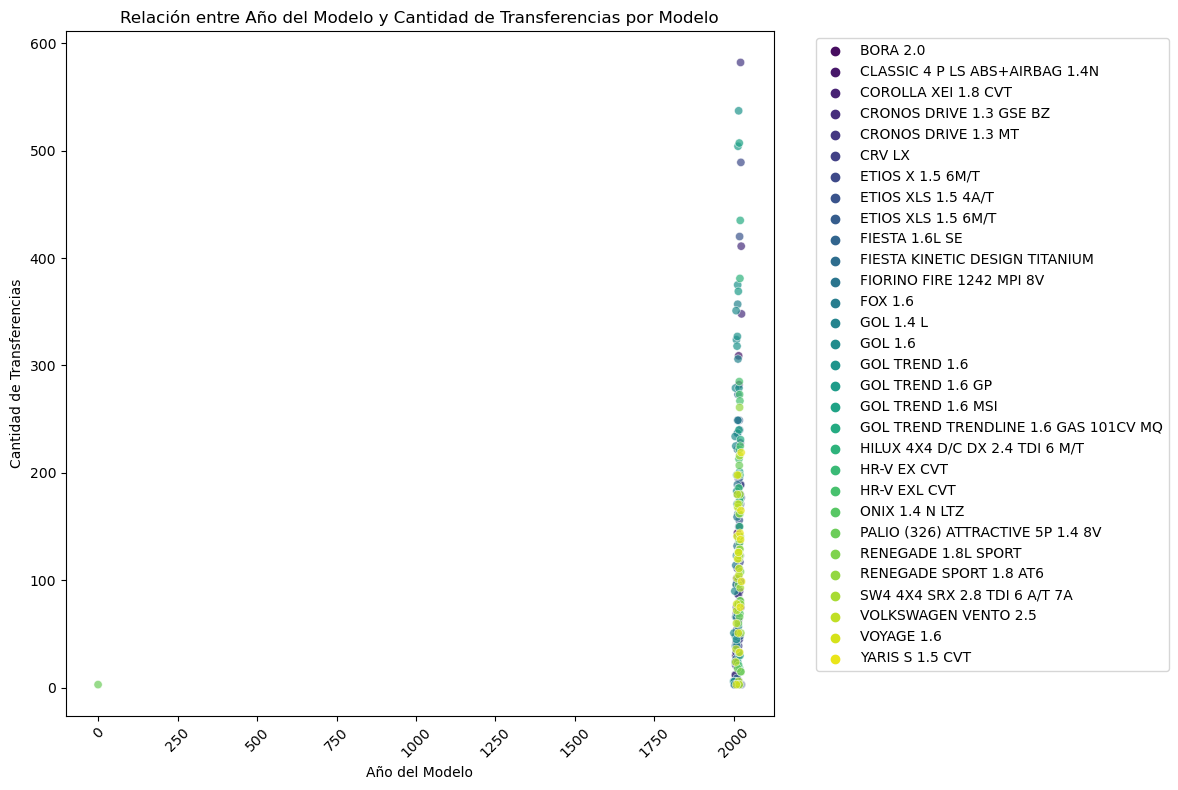

In [71]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_top_30_agrupado, x='automotor_anio_modelo', y='cantidad_transferencias', hue='automotor_modelo_descripcion', palette='viridis', alpha=0.7)
plt.title('Relación entre Año del Modelo y Cantidad de Transferencias por Modelo')
plt.xlabel('Año del Modelo')
plt.ylabel('Cantidad de Transferencias')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


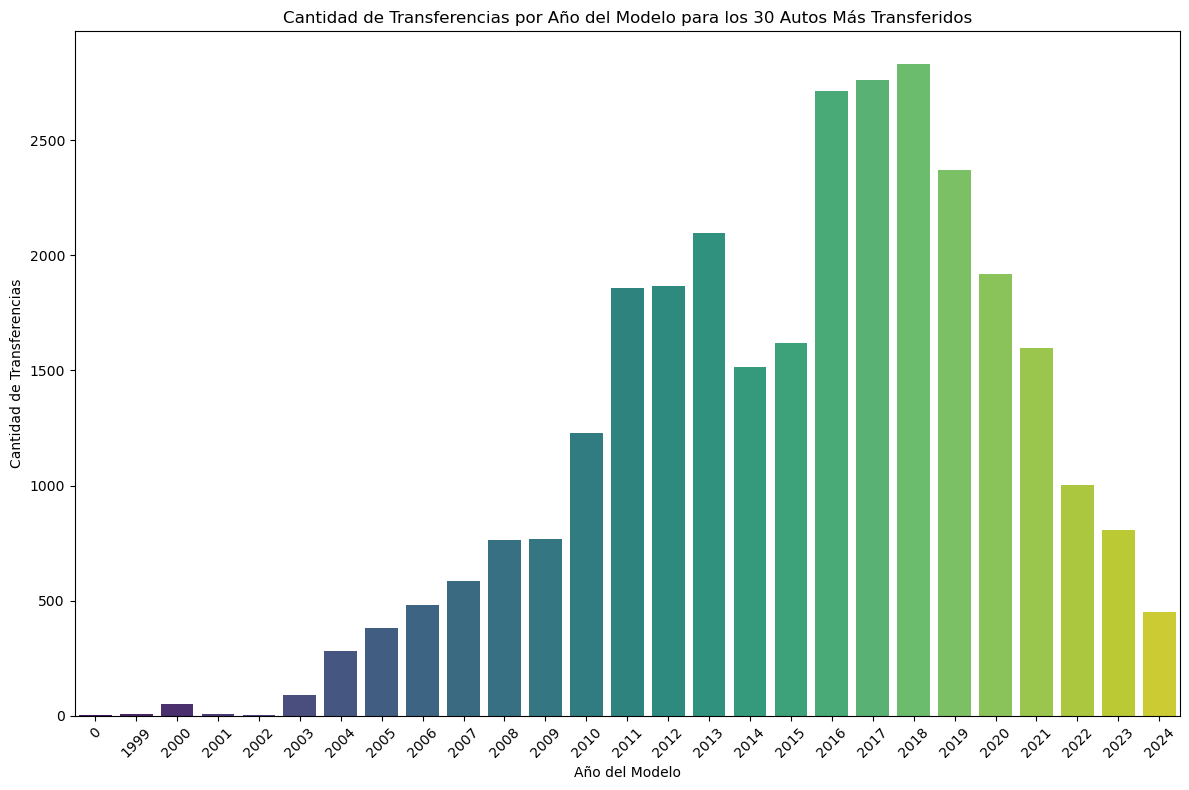

In [72]:
# Agrupar los datos por año del modelo y sumar las transferencias
df_barras = df_top_30_agrupado.groupby('automotor_anio_modelo')['cantidad_transferencias'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=df_barras, x='automotor_anio_modelo', y='cantidad_transferencias', palette='viridis')
plt.title('Cantidad de Transferencias por Año del Modelo para los 30 Autos Más Transferidos')
plt.xlabel('Año del Modelo')
plt.ylabel('Cantidad de Transferencias')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [51]:
df['automotor_marca_descripcion'].head(50)

0          JEEP IKA
1              FORD
2              FORD
3     MERCEDES BENZ
4           CITROEN
5           RENAULT
6              FIAT
7         CHEVROLET
8              JEEP
9          JEEP IKA
10        CHEVROLET
11    MERCEDES-BENZ
12             FORD
13         CORMETAL
14             FORD
15            DANES
16     SOLA Y BRUSA
17    MERCEDES BENZ
18             KM O
19          RENAULT
20          PEUGEOT
21     SOLA Y BRUSA
22        CHEVROLET
23          RENAULT
24         CORMETAL
25          RENAULT
26          PEUGEOT
27    NAVARRO HNOS.
28     NAVARRO HNOS
29             FORD
30          RENAULT
31    SUZUKI VITARA
32          RENAULT
33          RENAULT
34             FORD
35          CITROEN
36          RENAULT
37     SOLA Y BRUSA
38          PEUGEOT
39         PETINARI
40         CORMETAL
41    MERCEDES BENZ
42          PEUGEOT
43          RENAULT
44    MERCEDES BENZ
45          CITROEN
46          PEUGEOT
47          RENAULT
48           SCANIA
49    MERCEDES BENZ


In [52]:
df_caba_audi = df_caba[df_caba['automotor_marca_descripcion'] == 'AUDI']

df_caba_audi

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,mes_anio,mes
15512,TRANSFERENCIA IMPORTADO,2024-07-10,2015-03-30,2010,CAPITAL FEDERAL Nº 010,Ciudad Autónoma de Bs.As.,Importado,2012.0,26,DESCAPOTABLE,...,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1978.0,ARGENTINA,100,2,ARG,2024-07,7
16338,TRANSFERENCIA IMPORTADO,2024-07-22,2012-12-03,2018,CAPITAL FEDERAL Nº 018,Ciudad Autónoma de Bs.As.,Importado,2012.0,26,DESCAPOTABLE,...,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1971.0,ARGENTINA,100,2,ARG,2024-07,7
16339,TRANSFERENCIA IMPORTADO,2024-07-22,2012-12-03,2018,CAPITAL FEDERAL Nº 018,Ciudad Autónoma de Bs.As.,Importado,2012.0,26,DESCAPOTABLE,...,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Femenino,2000.0,ARGENTINA,100,2,ARG,2024-07,7
18354,TRANSFERENCIA IMPORTADO,2024-07-15,2011-06-02,2002,CAPITAL FEDERAL Nº 002,Ciudad Autónoma de Bs.As.,Importado,2011.0,22,SEDAN 3 PTAS,...,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,2005.0,ARGENTINA,100,2,ARG,2024-07,7
18359,TRANSFERENCIA IMPORTADO,2024-07-30,2012-04-04,2005,CAPITAL FEDERAL Nº 005,Ciudad Autónoma de Bs.As.,Importado,2012.0,22,SEDAN 3 PUERTAS,...,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1983.0,ARGENTINA,100,2,ARG,2024-07,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763873,TRANSFERENCIA IMPORTADO DE COM. HAB.,2024-03-22,2017-01-16,2061,CAPITAL FEDERAL Nº 061,Ciudad Autónoma de Bs.As.,Importado,2017.0,2.0,SEDAN 4 PUERTAS,...,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1999.0,ARGENTINA,100,2,ARG,2024-03,3
2763902,TRANSFERENCIA IMPORTADO,2024-03-05,2009-01-09,2067,CAPITAL FEDERAL Nº 067,Ciudad Autónoma de Bs.As.,Importado,2009.0,2.0,SEDAN 4 PTAS,...,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1993.0,ARGENTINA,100,2,ARG,2024-03,3
2763949,TRANSFERENCIA IMPORTADO,2024-03-15,2008-08-29,2064,CAPITAL FEDERAL Nº 064,Ciudad Autónoma de Bs.As.,Importado,2008.0,2.0,SEDAN 4 PTAS,...,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1997.0,ARGENTINA,100,2,ARG,2024-03,3
2763961,TRANSFERENCIA IMPORTADO,2024-03-27,2013-06-24,2057,CAPITAL FEDERAL Nº 057,Ciudad Autónoma de Bs.As.,Importado,2013.0,2.0,SEDAN 4 PUERTAS,...,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1999.0,ARGENTINA,100,2,ARG,2024-03,3


In [53]:
df_caba_audi['automotor_modelo_descripcion'].unique()

array(['A3 CABRIO 1.8 T FSI', 'TT ROADSTER 1.8T FSI', 'A1 1.4T FSI',
       'A3 1.4 T FSI', 'A1 1.4T FSI SLINE', 'S3 2.0 T FSI  QUATTRO',
       'A1 1.2 T FSI', 'A3 1.6', 'A3 1.8 T', 'A3 1.8 T FSI',
       'A3 2.0T FSI', 'A3 2.0 FSI', 'TT COUPE 1.8T FSI',
       'A5 2.0T FSI QUATTRO',
       'TT RS COUPE 2.5 TFSI S TRONIC QUATTRO (400CV)',
       'A5 3.0T FSI QUATTRO', 'S5 3.0 V6T FSI QUATTRO',
       'TT COUPE 3.2 QUATTRO', 'TT COUPE 2.0 T FSI',
       'TT RS COUPE 2.5T FSI QUATTRO', 'Q8 55 TFSI TIPTRONIC QUATTRO',
       'Q5 2.0T FSI QUATTRO', 'SQ5 3.0 V6 TFSI TIPTRONIC QUATTRO',
       'Q3 2.0 TFSI QUATTRO', 'Q7 3.0 V6T FSI QUATTRO',
       'Q5 45 TFSI ADVANCED STRONIC QUATTRO',
       'Q5 45 TFSI S-TRONIC QUATTRO', 'Q7 3.0 TDI QUATTRO',
       'Q5 45 TFSI OFFROAD STRONIC QUATTRO', 'Q5 3.0 TDI QUATTRO',
       'Q7 3.0T FSI QUATTRO', 'Q5 2.0 TFSI S TRONIC QUATTRO (252 CV)',
       'A3 SPORTBACK 1.4 T FSI', 'A1 SPORTBACK 1.4 TFSI',
       'A3 SPORTBACK 2.0 T FSI', 'A3 SPORTBACK 1.8 T 

In [54]:
df.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id', 'mes_anio', 'mes'],
      dtype='object')

In [55]:
junio =pd.read_csv('dnrpa-transferencias-autos-202406.csv', low_memory=False)
junio.head(20)

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,TRANSFERENCIA IMPORTADO,2024-06-10,1996-02-07,11007,INTENDENTE ALVEAR,La Pampa,Importado,1995.0,NaN,VAN,...,Privado,Física,INTENDENTE ALVEAR,LA PAMPA,Masculino,1966.0,ARGENTINA,100,42,ARG
1,TRANSFERENCIA NACIONAL,2024-06-13,1995-01-18,11006,GUATRACHE,La Pampa,Nacional,1995.0,NaN,MICROOMNIBUS,...,Privado,Física,LAMARQUE,LA PAMPA,Masculino,1971.0,ARGENTINA,100,42,ARG
2,TRANSFERENCIA NACIONAL C/PEDIDO,2024-06-13,1995-01-18,11006,GUATRACHE,La Pampa,Nacional,1995.0,NaN,MICROOMNIBUS,...,Privado,Física,MACACHIN,LA PAMPA,Masculino,1980.0,ARGENTINA,100,42,ARG
3,TRANSFERENCIA NACIONAL C/PEDIDO,2024-06-14,1990-06-26,11009,GENERAL PICO Nº 2,La Pampa,Nacional,1990.0,NaN,BERLINA 4 PUERTAS,...,Privado,Física,GENERAL PICO,LA PAMPA,Femenino,1989.0,ARGENTINA,100,42,ARG
4,TRANSFERENCIA NACIONAL,2024-06-25,1997-06-26,11005,REALICO,La Pampa,Nacional,1997.0,NaN,BERLINA 5 PTAS,...,Privado,Física,REALICO,LA PAMPA,Femenino,1989.0,ARGENTINA,100,42,ARG
5,TRANSFERENCIA NACIONAL,2024-06-05,1978-08-18,11008,SANTA ROSA Nº 2,La Pampa,Nacional,2000.0,NaN,ACOPLADO CARRETON,...,Privado,Jurídica,COLONIA SANTA TERESA,LA PAMPA,No aplica,1994.0,No aplica,100,42,NaN
6,TRANSFERENCIA NACIONAL,2024-06-10,2009-01-13,11007,INTENDENTE ALVEAR,La Pampa,Nacional,2008.0,NaN,ACOPLADO BDAS.VOLV,...,Privado,Física,INTENDENTE ALVEAR,LA PAMPA,Masculino,1981.0,ARGENTINA,100,42,ARG
7,TRANSFERENCIA NACIONAL,2024-06-24,1985-08-21,11005,REALICO,La Pampa,Nacional,1985.0,NaN,BERLINA 5 PUERTAS,...,Privado,Física,RANCUL,LA PAMPA,Masculino,1969.0,ARGENTINA,100,42,ARG
8,TRANSFERENCIA NACIONAL,2024-06-04,1972-02-17,11010,SANTA ROSA Nº 3,La Pampa,Nacional,1930.0,NaN,AUTOMOVIL,...,Privado,Física,C.AUTONOMA DE BS.AS,LA PAMPA,Masculino,1951.0,ARGENTINA,100,42,ARG
9,TRANSFERENCIA NACIONAL,2024-06-11,2008-03-11,11005,REALICO,La Pampa,Nacional,2008.0,NaN,ACOPLADO TODO PUERTA,...,Privado,Física,HUINCA RENANCO,LA PAMPA,Masculino,1961.0,ARGENTINA,100,42,ARG


In [56]:
modelo_mas_transferido_junio = junio['automotor_modelo_descripcion'].value_counts().idxmax()
cantidad_transferencias_junio = junio['automotor_modelo_descripcion'].value_counts().max()

print(f"El modelo más transferido es: {modelo_mas_transferido_junio} con {cantidad_transferencias_junio} transferencias.")

El modelo más transferido es: GOL 1.6 con 1970 transferencias.


In [57]:
# 1. Filtrar el DataFrame para CABA
df_caba_junio = junio[junio['titular_domicilio_provincia'] == 'C.AUTONOMA DE BS.AS']

# 2. Contar las transferencias por modelo en CABA
transferencias_por_modelo_caba_junio = df_caba_junio['automotor_modelo_descripcion'].value_counts()

# 3. Obtener los 10 modelos más transferidos en CABA
top_10_modelos_caba_junio = transferencias_por_modelo_caba_junio.head(10)

# Mostrar los resultados
print(top_10_modelos_caba_junio)

GOL TREND 1.6                 104
GOL 1.6                        92
VOLKSWAGEN VENTO 2.5           61
FOX 1.6                        59
ETIOS X 1.5 6M/T               59
ETIOS XLS 1.5 4A/T             56
BMO 368 VERSION 1621L55 CA     53
CRONOS DRIVE 1.3 MT            50
YARIS S 1.5 CVT                49
208 ACTIVE PK AT AM24          46
Name: automotor_modelo_descripcion, dtype: int64


In [58]:
df['automotor_modelo_descripcion'],['automotor_modelo_codigo']

(0                              JA-1B
 1                          FORD 1961
 2                  TAUNUS VERSION GT
 3                             1117 D
 4          BERLINGO FURGON 1.9D FULL
                      ...            
 2768062                         118I
 2768063              TRACKER 1.2T MT
 2768064          CRONOS DRIVE 1.3 MT
 2768065      PUNTO ATTRACTIVE 1.4 8V
 2768066      PUNTO ATTRACTIVE 1.4 8V
 Name: automotor_modelo_descripcion, Length: 2768067, dtype: object,
 ['automotor_modelo_codigo'])

In [59]:
df['automotor_modelo_codigo']

0           04
1          NaN
2           21
3          751
4           20
          ... 
2768062    376
2768063    780
2768064     CJ
2768065    729
2768066    729
Name: automotor_modelo_codigo, Length: 2768067, dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768067 entries, 0 to 2768066
Data columns (total 27 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   tramite_tipo                    object        
 1   tramite_fecha                   datetime64[ns]
 2   fecha_inscripcion_inicial       datetime64[ns]
 3   registro_seccional_codigo       int64         
 4   registro_seccional_descripcion  object        
 5   registro_seccional_provincia    object        
 6   automotor_origen                object        
 7   automotor_anio_modelo           float64       
 8   automotor_tipo_codigo           object        
 9   automotor_tipo_descripcion      object        
 10  automotor_marca_codigo          object        
 11  automotor_marca_descripcion     object        
 12  automotor_modelo_codigo         object        
 13  automotor_modelo_descripcion    object        
 14  automotor_uso_codigo            float64       
 15

In [61]:
# Eliminar valores NaN o convertir valores no válidos a un número predeterminado
df['automotor_anio_modelo'] = pd.to_numeric(df['automotor_anio_modelo'], errors='coerce').fillna(0).astype(int)
